In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import scipy.stats as stat
from scipy import asarray as ar,exp

## If you want to watch the simulation on hyak:
cd /suppscr/pfaendtner/gdavids3/research/PEG_parametrization/triazine/AA/my_first_sim

vmd frame1.gro trajpbc.xtc

# Checking non-bonded parameters

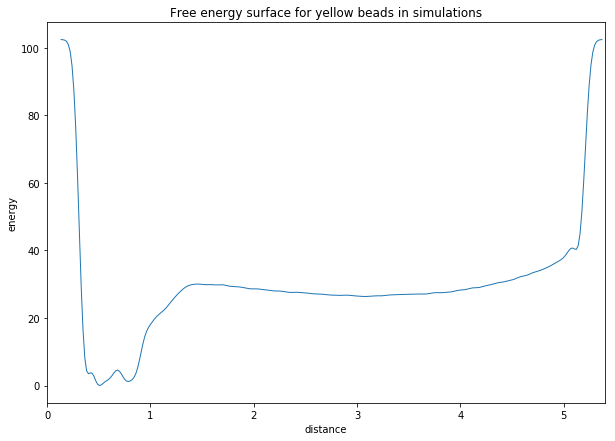

In [76]:
data1=pd.read_csv('files/fes6.dat',skiprows=5,names=['distance','energy','error'],delim_whitespace=True)
plt.figure(figsize=(10,7))
plt.plot(data1['distance'],data1['energy'], lw=1)
plt.xlabel('distance')
plt.ylabel('energy')
plt.title('Free energy surface for yellow beads in simulations')
plt.xlim([0,5.4])
plt.show()

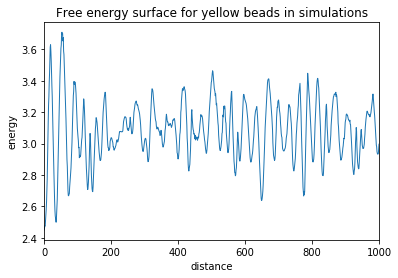

Mean distance of molecules from each other:  3.08080039461


In [78]:
data2=pd.read_csv('files/DISTANCES_1sim',delim_whitespace=True,header=0,skipinitialspace=True)
plt.plot(data2['time'],data2['d_SNaSNa_1'], lw=1)
plt.xlabel('distance')
plt.ylabel('energy')
plt.title('Free energy surface for yellow beads in simulations')
plt.xlim([0,1000])
plt.show()
print('Mean distance of molecules from each other: ', np.mean(data2['d_SNaSNa_1']))

# Checking bonded parameters
### BONDS

In [79]:
T=300
kb=1.38064852*10**(-23)

Na=6.02214e23
def gaussian(x,a,b,c):
    func=a*exp(-(x-b)**2/(2*c**2))
    return(func)

def gaus(x,a,x0,sigma):
    
    return(a*exp(-(x-x0)**2/(2*sigma**2)))

def making_me_bonds(bond):
    data1=pd.read_csv('files/bonds2_' +bond+'.xvg',skiprows=13,delim_whitespace=True, names=["bond","frequency"])
    num=sum(data1['frequency'])
    x= data1['bond']
    y=data1['frequency']/num
    x0 = sum((x)*(y))                  
    sigma = (sum(y*(x-x0)**2))**0.5
    print('mean=  ',x0)
    print('sigma= ',sigma)
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])

    plt.plot(x,y,'b+:',label='data')
    plt.plot(x,gaus(x,*popt),'ro:',label='fit')
    plt.legend()
    plt.xlabel('bond of ' +str(bond))
    plt.ylabel('Frequency')
    plt.show()
    
    y_fits=gaussian(x,popt[0],popt[1],popt[2])
    std=np.std([x,y_fits])
    force_const=kb*T*Na/((std**2))
    print('force constant= ',force_const) #Angle
    #return()

mean=   0.311241398941
sigma=  0.00449647759772


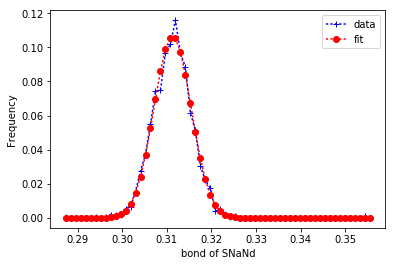

force constant=  103958.48042


In [50]:
making_me_bonds('SNaNd')

mean=   0.309396364225
sigma=  0.0055865930597


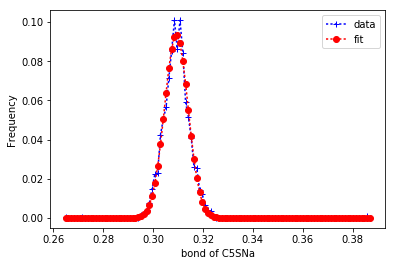

force constant=  95916.7404523


In [51]:
making_me_bonds('C5SNa')

mean=   0.311241398941
sigma=  0.00449647759772


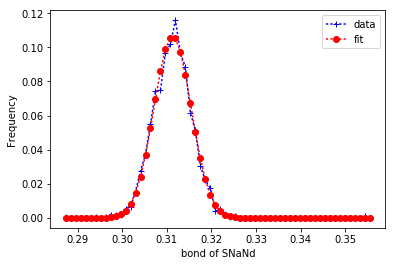

force constant=  103958.48042


In [39]:
making_me_bonds('SNaNd')

### ANGLES

In [80]:
def making_me_angles(angle,unit):
    data=pd.read_csv('files/angdist2_' +angle+'.xvg',skiprows=13,delim_whitespace=True, names=["Angle","frequency"])
    if unit == 'radians' or unit == 'r':
        x= data['Angle']/57.296
        units=' (radians)'
    else:
        x= data['Angle']
        units=' (degrees)'
    y=data['frequency']

    n = len(data["Angle"])+1
    x0 = sum((x)*(data["frequency"]))
    sigma = sum(y*(x-x0)**2)
    print('mean=  ',x0)
    print('sigma= ',sigma)
    popt,pcov = curve_fit(gaus,x,y,p0=[1,x0,sigma])

    plt.plot(x,y,'b+:',label='data')
    plt.plot(x,gaus(x,*popt),'ro:',label='fit')
    plt.legend()
    plt.xlabel('Angle of '+angle+units)
    plt.ylabel('Frequency')
    plt.show()

    y_fits=gaussian(x,popt[0],popt[1],popt[2])
    std=np.std([x,y_fits])
    force_const=kb*T*Na/((std**2))
    print('force constant= ',force_const)

mean=   110.965967
sigma=  4.51292053824


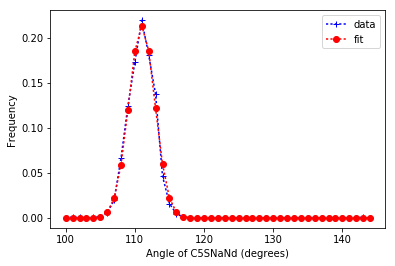

force constant=  0.655719161538


In [81]:
making_me_angles('C5SNaNd','d')

mean=   125.200689
sigma=  4.25527856286


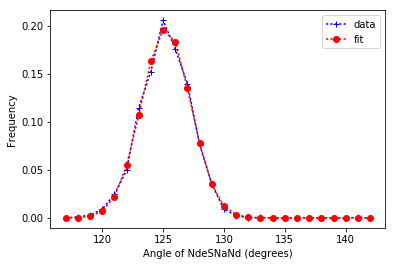

force constant=  0.591327142642


In [82]:
making_me_angles('NdeSNaNd','d')

mean=   117.103017
sigma=  4.2102176143


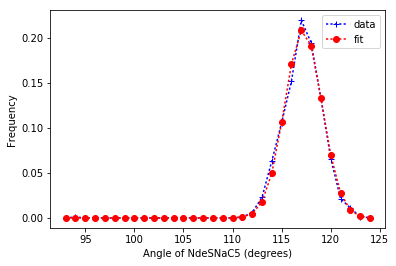

force constant=  0.835902020817


In [83]:
making_me_angles('NdeSNaC5','d')